### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

### Loading Datasets

In [3]:
results=pd.read_csv('Datasets/results.csv')
former_names=pd.read_csv('Datasets/former_names.csv')
goal_scorers=pd.read_csv('Datasets/goalscorers.csv')
shootouts=pd.read_csv('Datasets/shootouts.csv')

### Initial Data Inspection

In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# 1 Denotes home team win, 2 denotes away team win and 0 denotes a draw
results['winner']=np.where(
    results['home_score']>results['away_score'],1,
    np.where(results['away_score']>results['home_score'],2,0)
)

In [6]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1


In [7]:
results['date']=pd.to_datetime(results['date'])

In [8]:
results.describe()

,date,home_score,away_score,winner
count,48891,48891.000000,48891.000000,48891.000000
mean,1994-01-11 01:39:27.822298624,1.757338,1.182447,1.055368
min,1872-11-30 00:00:00,0.000000,0.000000,0.000000
25%,1980-05-16 12:00:00,1.000000,0.000000,1.000000
50%,2000-04-26 00:00:00,1.000000,1.000000,1.000000
75%,2013-02-06 00:00:00,2.000000,2.000000,2.000000
max,2025-12-18 00:00:00,31.000000,21.000000,2.000000
std,NaN,1.772215,1.401666,0.711837


In [9]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
winner        0
dtype: int64

In [10]:
results.duplicated().sum()

np.int64(0)

In [11]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48891 entries, 0 to 48890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48891 non-null  datetime64[ns]
 1   home_team   48891 non-null  object        
 2   away_team   48891 non-null  object        
 3   home_score  48891 non-null  int64         
 4   away_score  48891 non-null  int64         
 5   tournament  48891 non-null  object        
 6   city        48891 non-null  object        
 7   country     48891 non-null  object        
 8   neutral     48891 non-null  bool          
 9   winner      48891 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 3.4+ MB


In [12]:
shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [13]:
shootouts['date']=pd.to_datetime(shootouts['date'])

In [14]:
shootouts['first_shooter'].value_counts()

first_shooter
Colombia                  11
Italy                     10
Brazil                     9
Uruguay                    8
Argentina                  8
                          ..
British Virgin Islands     1
Slovenia                   1
Venezuela                  1
Cambodia                   1
Gozo                       1
Name: count, Length: 89, dtype: int64

In [15]:
shootouts.describe(include='all')

,date,home_team,away_team,winner,first_shooter
count,662,662,662,662,237
unique,NaN,185,193,181,89
top,NaN,South Africa,Egypt,South Korea,Colombia
freq,NaN,18,16,15,11
mean,2003-09-14 16:03:37.522658688,NaN,NaN,NaN,NaN
min,1967-08-22 00:00:00,NaN,NaN,NaN,NaN
25%,1992-09-02 06:00:00,NaN,NaN,NaN,NaN
50%,2003-09-25 00:00:00,NaN,NaN,NaN,NaN
75%,2016-06-29 00:00:00,NaN,NaN,NaN,NaN
max,2025-12-12 00:00:00,NaN,NaN,NaN,NaN


In [16]:
shootouts.isna().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    425
dtype: int64

In [17]:
b=len(shootouts)
a=shootouts['first_shooter'].isna().sum()
print((a/b))


0.6419939577039275


In [18]:
for el in shootouts.columns:  
    if shootouts[el].isna().sum()>1:
        null_percentage=(shootouts[el].isna().sum()/len(shootouts))*100
        print(f'Column/s: {el} has {null_percentage}% of Null Values')

Column/s: first_shooter has 64.19939577039275% of Null Values


In [19]:
# We can see that the column first_shooter has 64% of null data so we remove the column entirely
shootouts.drop(columns=['first_shooter'],inplace=True)

In [20]:
shootouts.duplicated().sum()

np.int64(0)

In [21]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       662 non-null    datetime64[ns]
 1   home_team  662 non-null    object        
 2   away_team  662 non-null    object        
 3   winner     662 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.8+ KB


In [22]:
former_names.head()

,current,former,start_date,end_date
0,Benin,Dahomey,1959-11-08,1975-11-30
1,Burkina Faso,Upper Volta,1960-04-14,1984-08-04
2,Curaçao,Netherlands Antilles,1957-03-03,2010-10-10
3,Czechoslovakia,Bohemia,1903-04-05,1919-01-01
4,Czechoslovakia,Bohemia and Moravia,1939-01-01,1945-05-01


In [23]:
goal_scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


EDA


In [26]:
# total size of goals dataset
goal_scorers.shape

(44447, 8)

In [28]:
# Top 10 teams with most goals scored

team_goals = (
    goal_scorers
    .groupby('team')
    .size()
    .sort_values(ascending=False)
)

team_goals.head(10)


team
Brazil         1051
Germany         974
Argentina       948
Spain           894
Mexico          862
Netherlands     851
Uruguay         804
England         775
France          766
Italy           720
dtype: int64

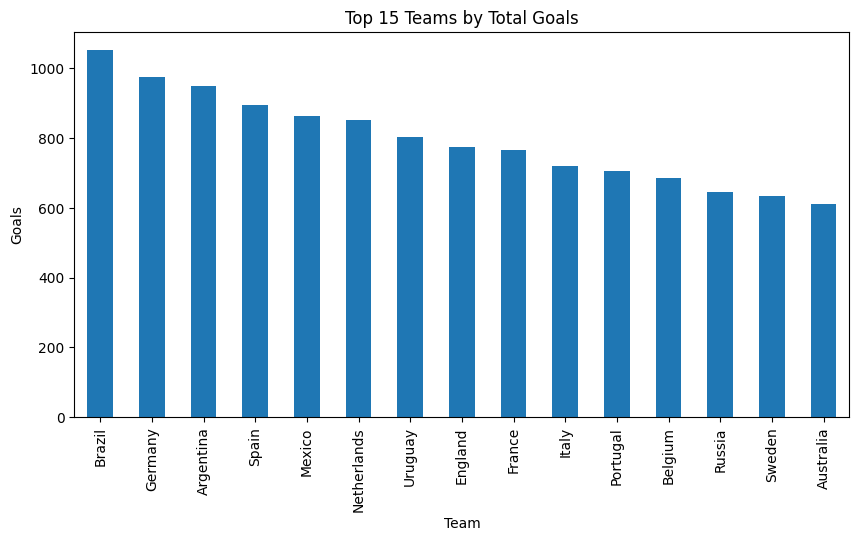

In [29]:
# Visualizing the top 15 teams with most goals scored

team_goals.head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Teams by Total Goals")
plt.ylabel("Goals")
plt.xlabel("Team")
plt.show()

In [30]:
# Goals scored by home and away teams

home_goals = goal_scorers[goal_scorers['team'] == goal_scorers['home_team']].shape[0]
away_goals = goal_scorers[goal_scorers['team'] == goal_scorers['away_team']].shape[0]

home_goals, away_goals

(26841, 17606)

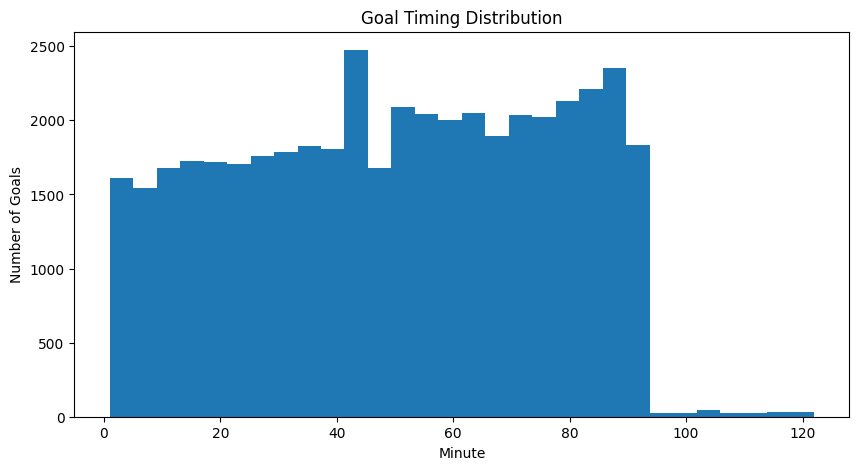

In [31]:
# Visualizing the distribution of goal timings
goal_scorers['minute'].plot(kind='hist', bins=30, figsize=(10,5))
plt.title("Goal Timing Distribution")
plt.xlabel("Minute")
plt.ylabel("Number of Goals")
plt.show()


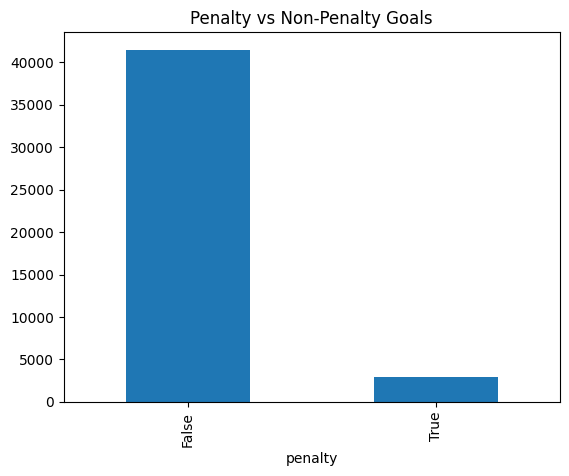

In [33]:
# Penalty vs Non-Penalty Goals
goal_scorers['penalty'].value_counts(normalize=True)

# Visualizing penalty vs non-penalty goals
goal_scorers['penalty'].value_counts().plot(kind='bar')
plt.title("Penalty vs Non-Penalty Goals")
plt.show()

In [ ]:
goals_per_year = (
    goal_scorers
    .groupby(goal_scorers['date'].dt.year)
    .size()
)

goals_per_year.plot(figsize=(12,5))
plt.title("Goals Over Time")
plt.xlabel("Year")
plt.ylabel("Goals")
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values